In [1]:
import functions as func
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import Normalizer
import seaborn as sns

In [2]:
register_matplotlib_converters()
data = pd.read_csv('data/pd_speech_features.csv', skiprows=[0])
data.shape

(756, 755)

<Figure size 432x288 with 0 Axes>

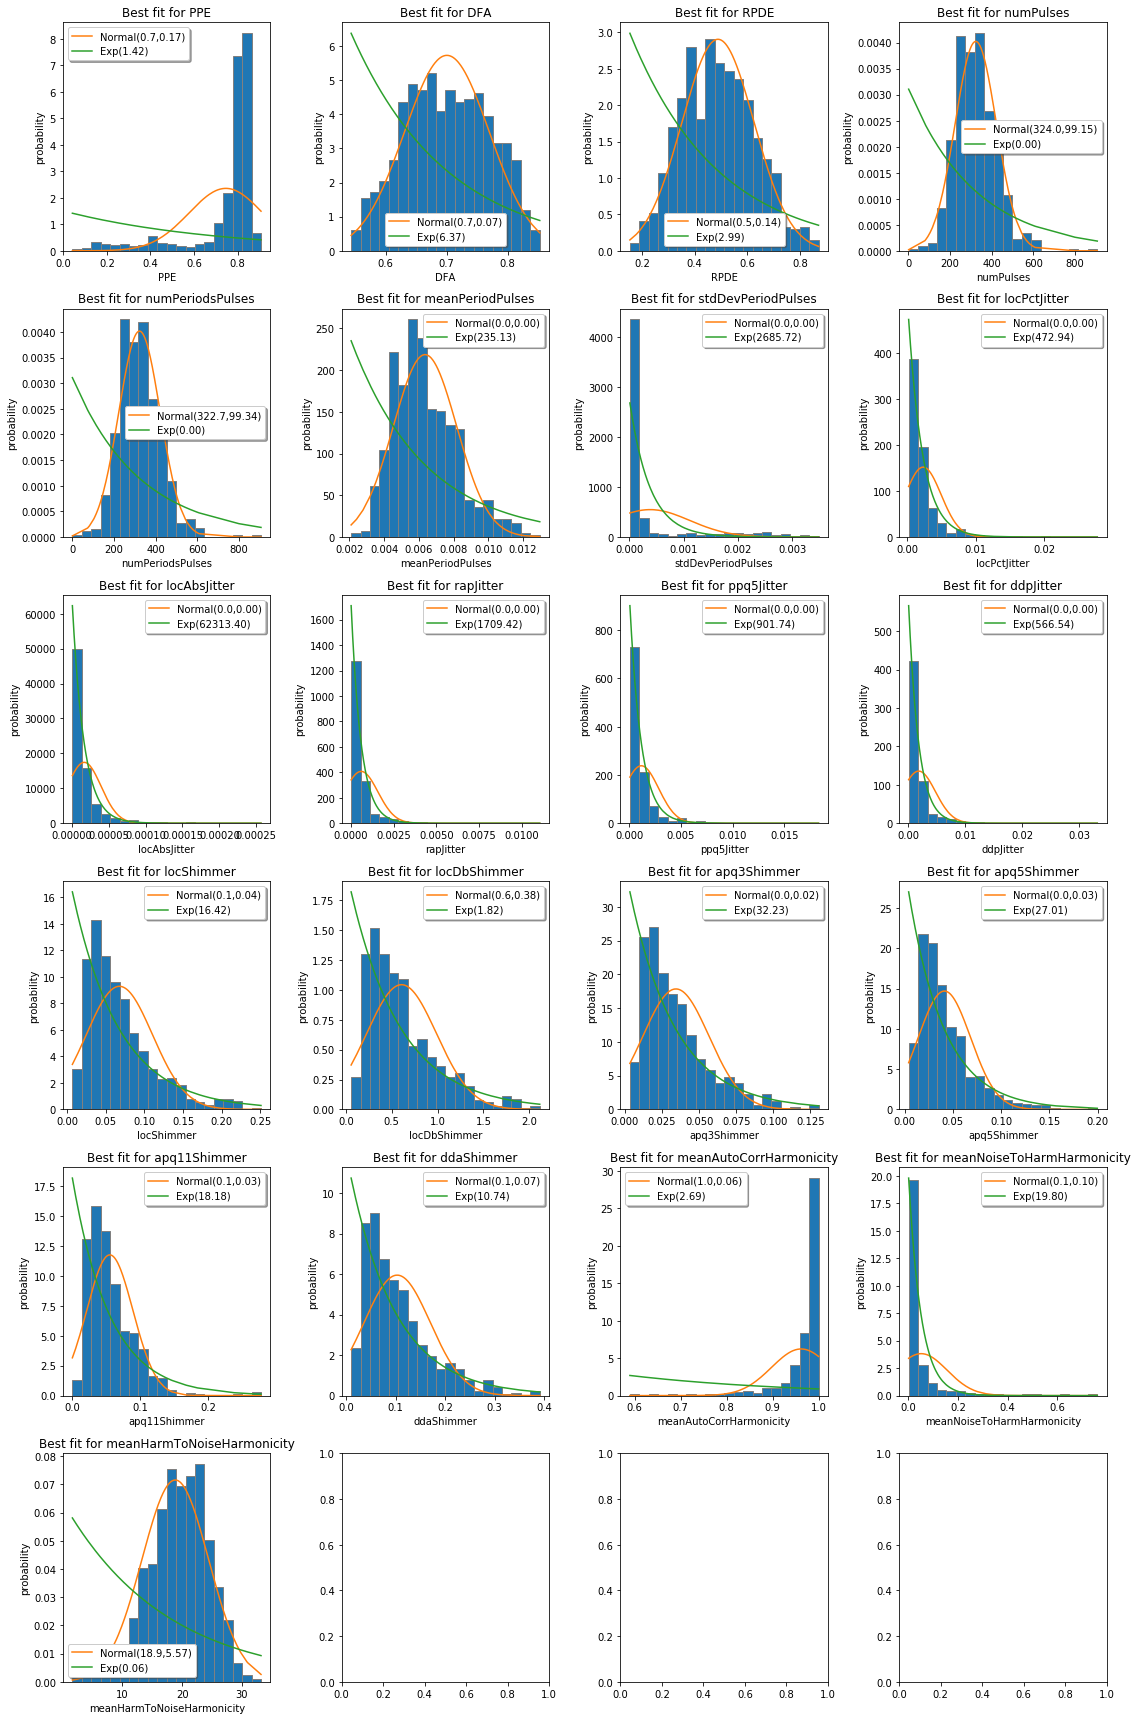

In [3]:

import scipy.stats as _stats 
def compute_known_distributions(x_values, n_bins) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # LogNorm
  #  sigma, loc, scale = _stats.lognorm.fit(x_values)
  #  distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    # Exponential
    loc, scale = _stats.expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # SkewNorm
   # a, loc, scale = _stats.skewnorm.fit(x_values)
   # distributions['SkewNorm(%.2f)'%a] = _stats.skewnorm.pdf(x_values, a, loc, scale) 
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, var: str):
    values = series.sort_values().values
    n, bins, patches = ax.hist(values, 20, density=True, edgecolor='grey')
    distributions = compute_known_distributions(values, bins)
    func.multiple_line_chart(ax, values, distributions, 'Best fit for %s'%var, var, 'probability')

columns = ['PPE','DFA','RPDE','numPulses','numPeriodsPulses','meanPeriodPulses',
           'stdDevPeriodPulses','locPctJitter','locAbsJitter','rapJitter','ppq5Jitter',
       'ddpJitter','locShimmer','locDbShimmer','apq3Shimmer','apq5Shimmer','apq11Shimmer',
       'ddaShimmer','meanAutoCorrHarmonicity','meanNoiseToHarmHarmonicity','meanHarmToNoiseHarmonicity']

rows, cols = func.choose_grid(len(columns)-1)
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    histogram_with_distributions(axs[i, j], data[columns[n]].dropna(), columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

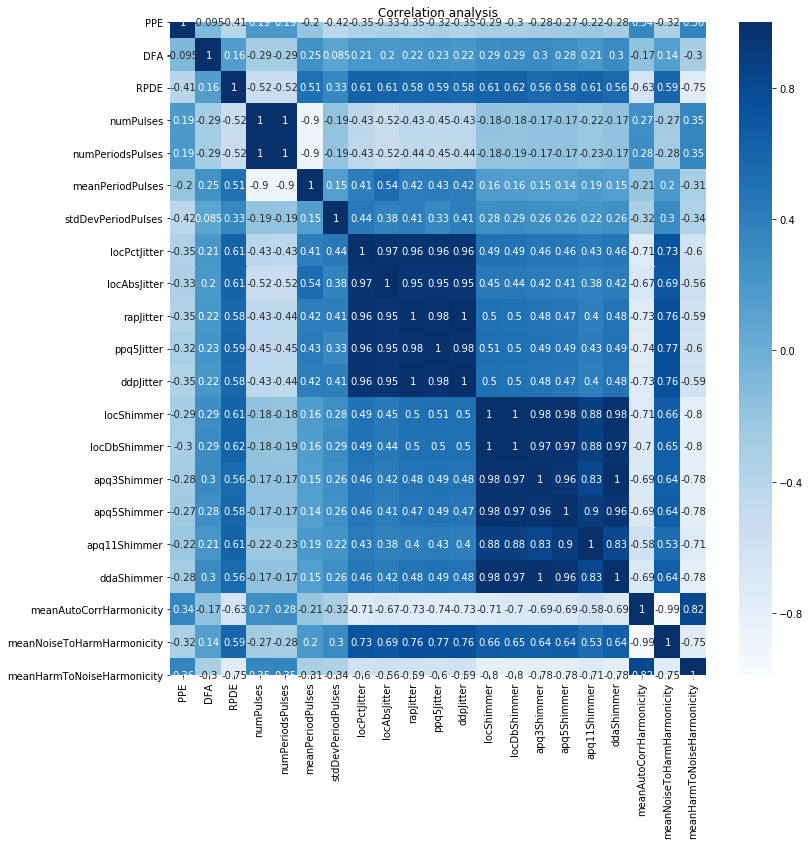

In [4]:
heat_data = data[['PPE','DFA','RPDE','numPulses','numPeriodsPulses','meanPeriodPulses',
           'stdDevPeriodPulses','locPctJitter','locAbsJitter','rapJitter','ppq5Jitter',
       'ddpJitter','locShimmer','locDbShimmer','apq3Shimmer','apq5Shimmer','apq11Shimmer',
       'ddaShimmer','meanAutoCorrHarmonicity','meanNoiseToHarmHarmonicity','meanHarmToNoiseHarmonicity']]
fig = plt.figure(figsize=[12, 12])
corr_mtx = heat_data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

### Concluímos que todos os %jitter estão fortemente correlacionados e podem ser substituidos por apenas 1 variável. A mesmo observação pode ser feita para %Schimmer.
### É também observável que a variável meanNoiseToHarmHarmonicity está de alguma forma relacionada com as jitter.
### meanPeriodPulses tem uma correlação inversa com as varíaves numPeriodsPulses e numPulses. Igual para meanAutoCorrHarmonicity e meanNoiseToHarmHarmonicity.

<Figure size 432x288 with 0 Axes>

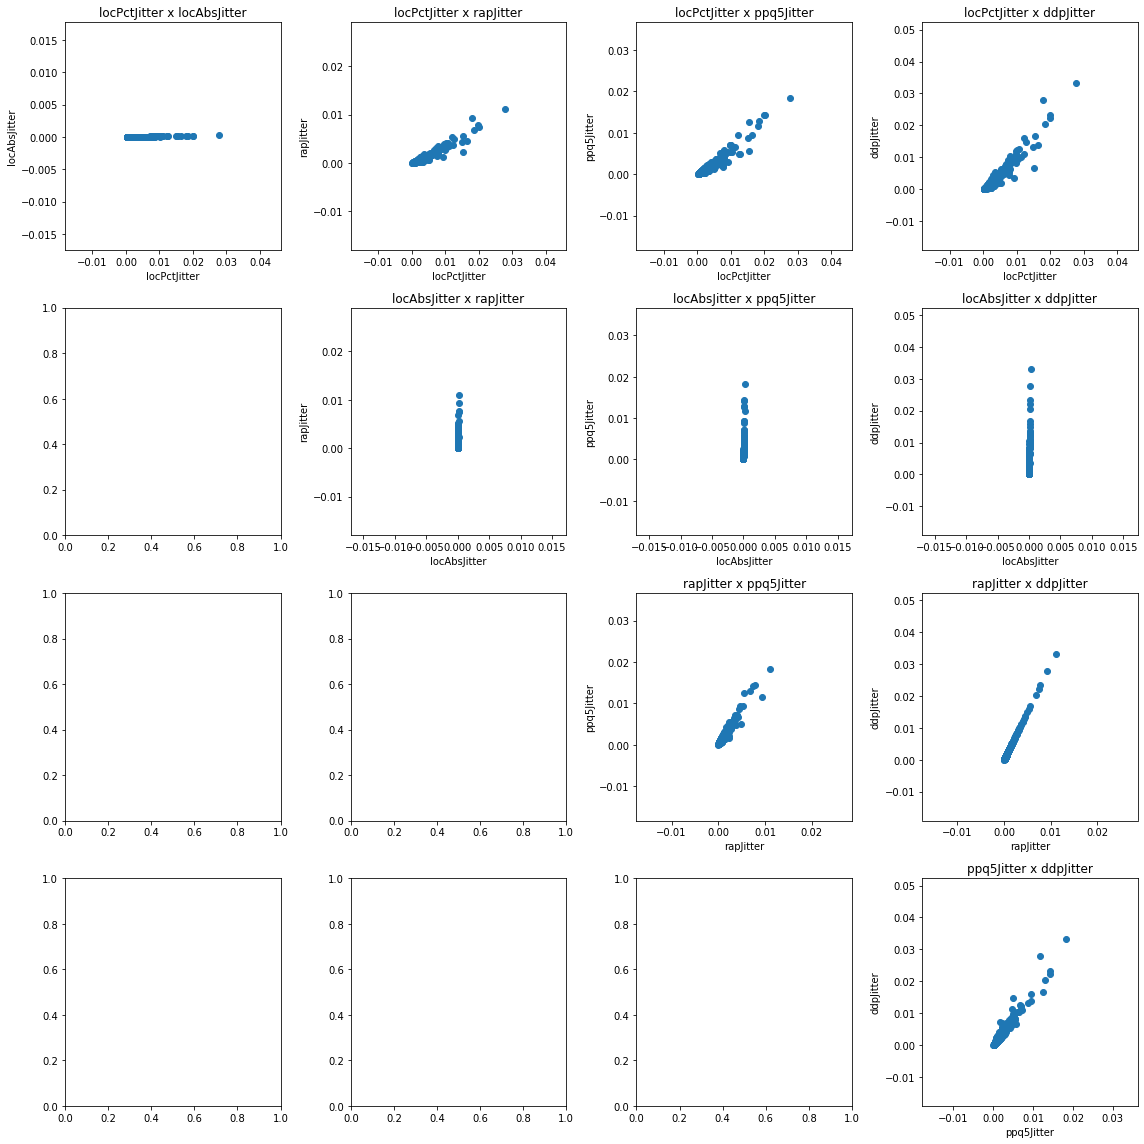

In [6]:
columns = ['locPctJitter','locAbsJitter','rapJitter','ppq5Jitter',
       'ddpJitter']
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

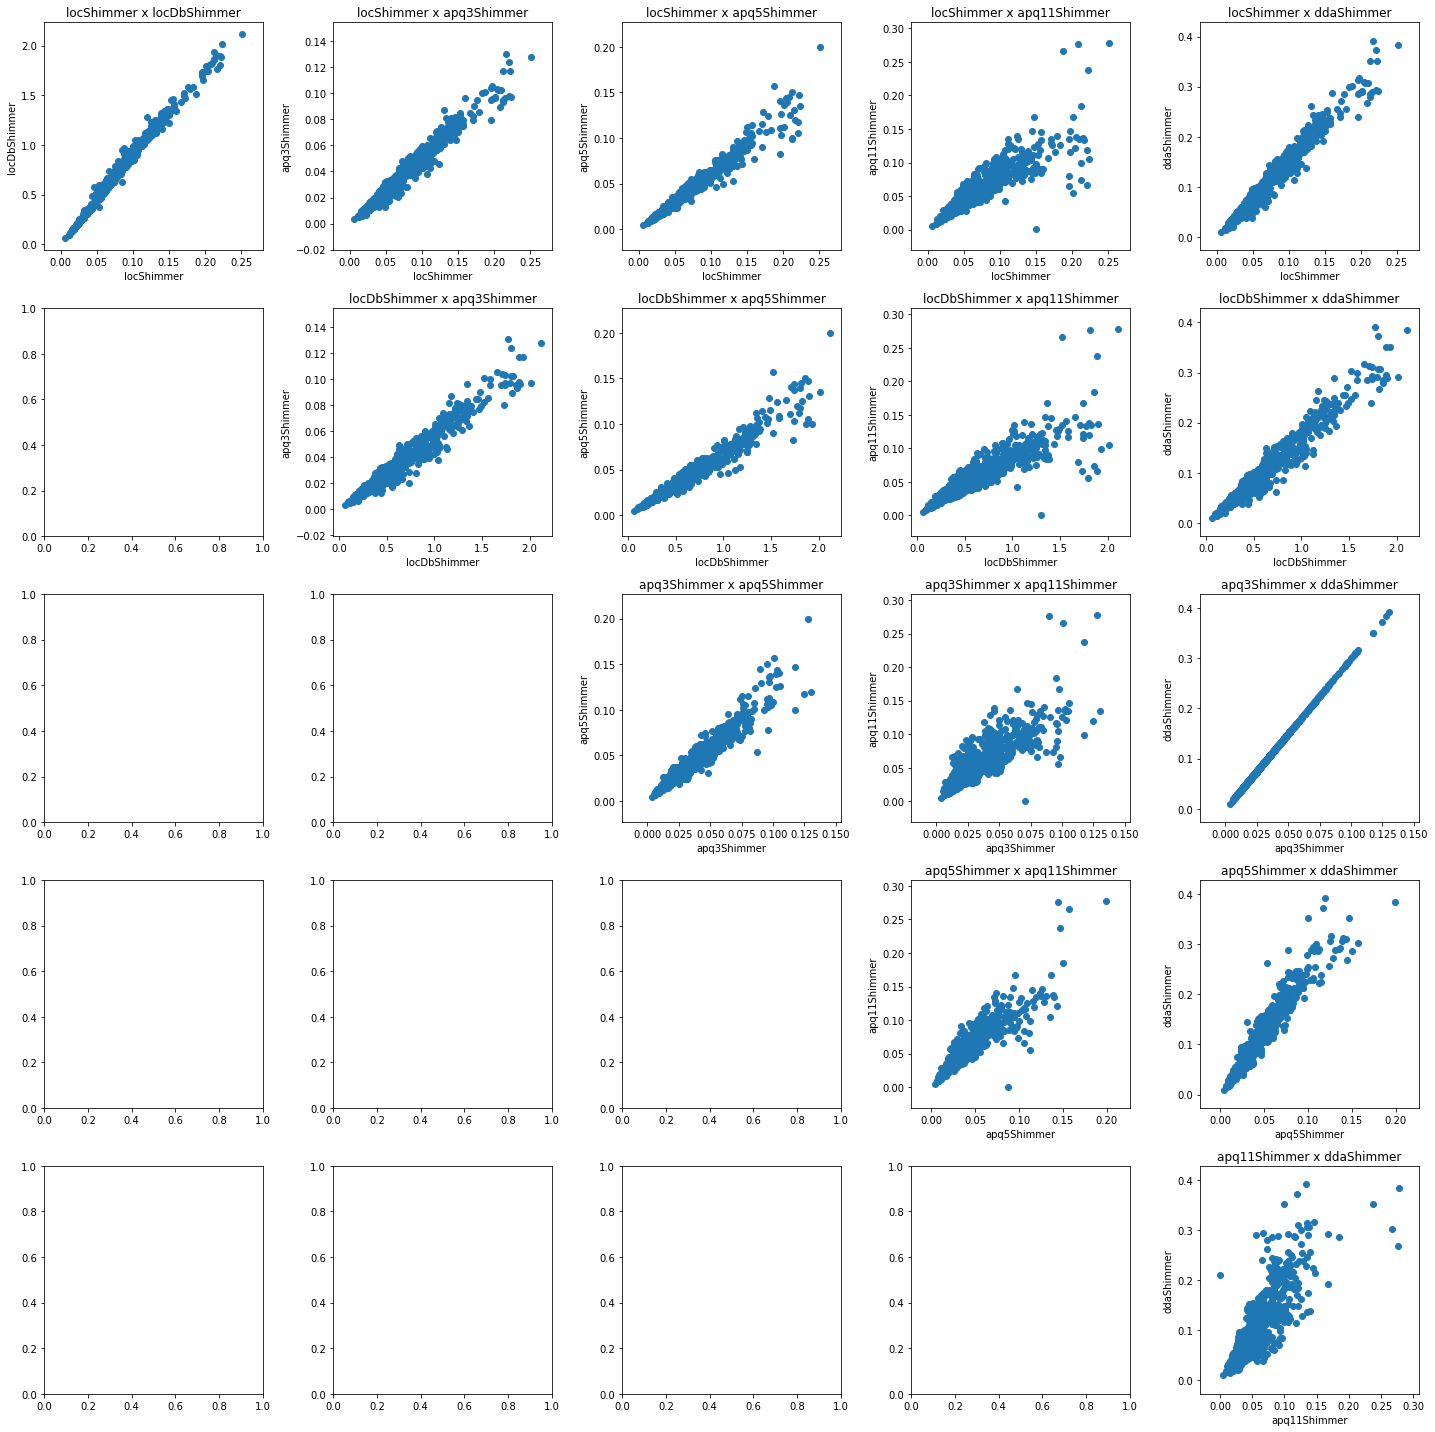

In [7]:
columns = ['locShimmer','locDbShimmer','apq3Shimmer','apq5Shimmer','apq11Shimmer',
       'ddaShimmer']
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

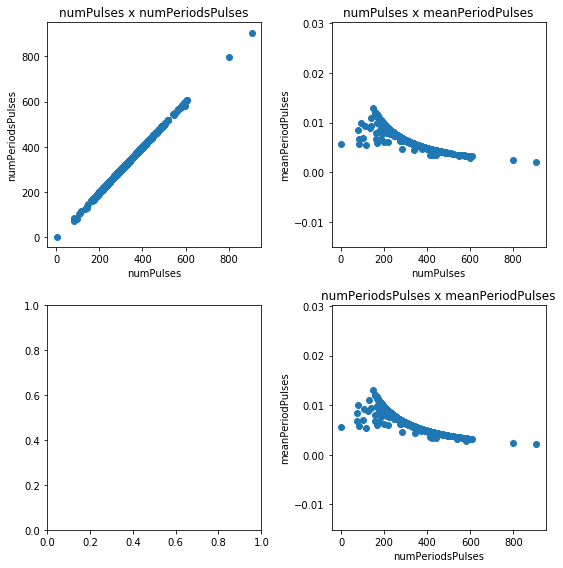

In [8]:
columns = ['numPulses','numPeriodsPulses','meanPeriodPulses']
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

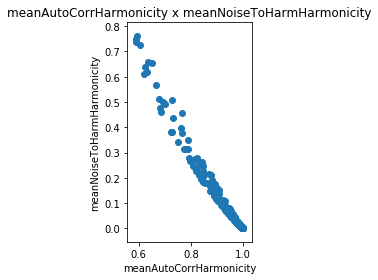

In [9]:
columns = ['meanAutoCorrHarmonicity','meanNoiseToHarmHarmonicity']
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
fig.tight_layout()
plt.show()

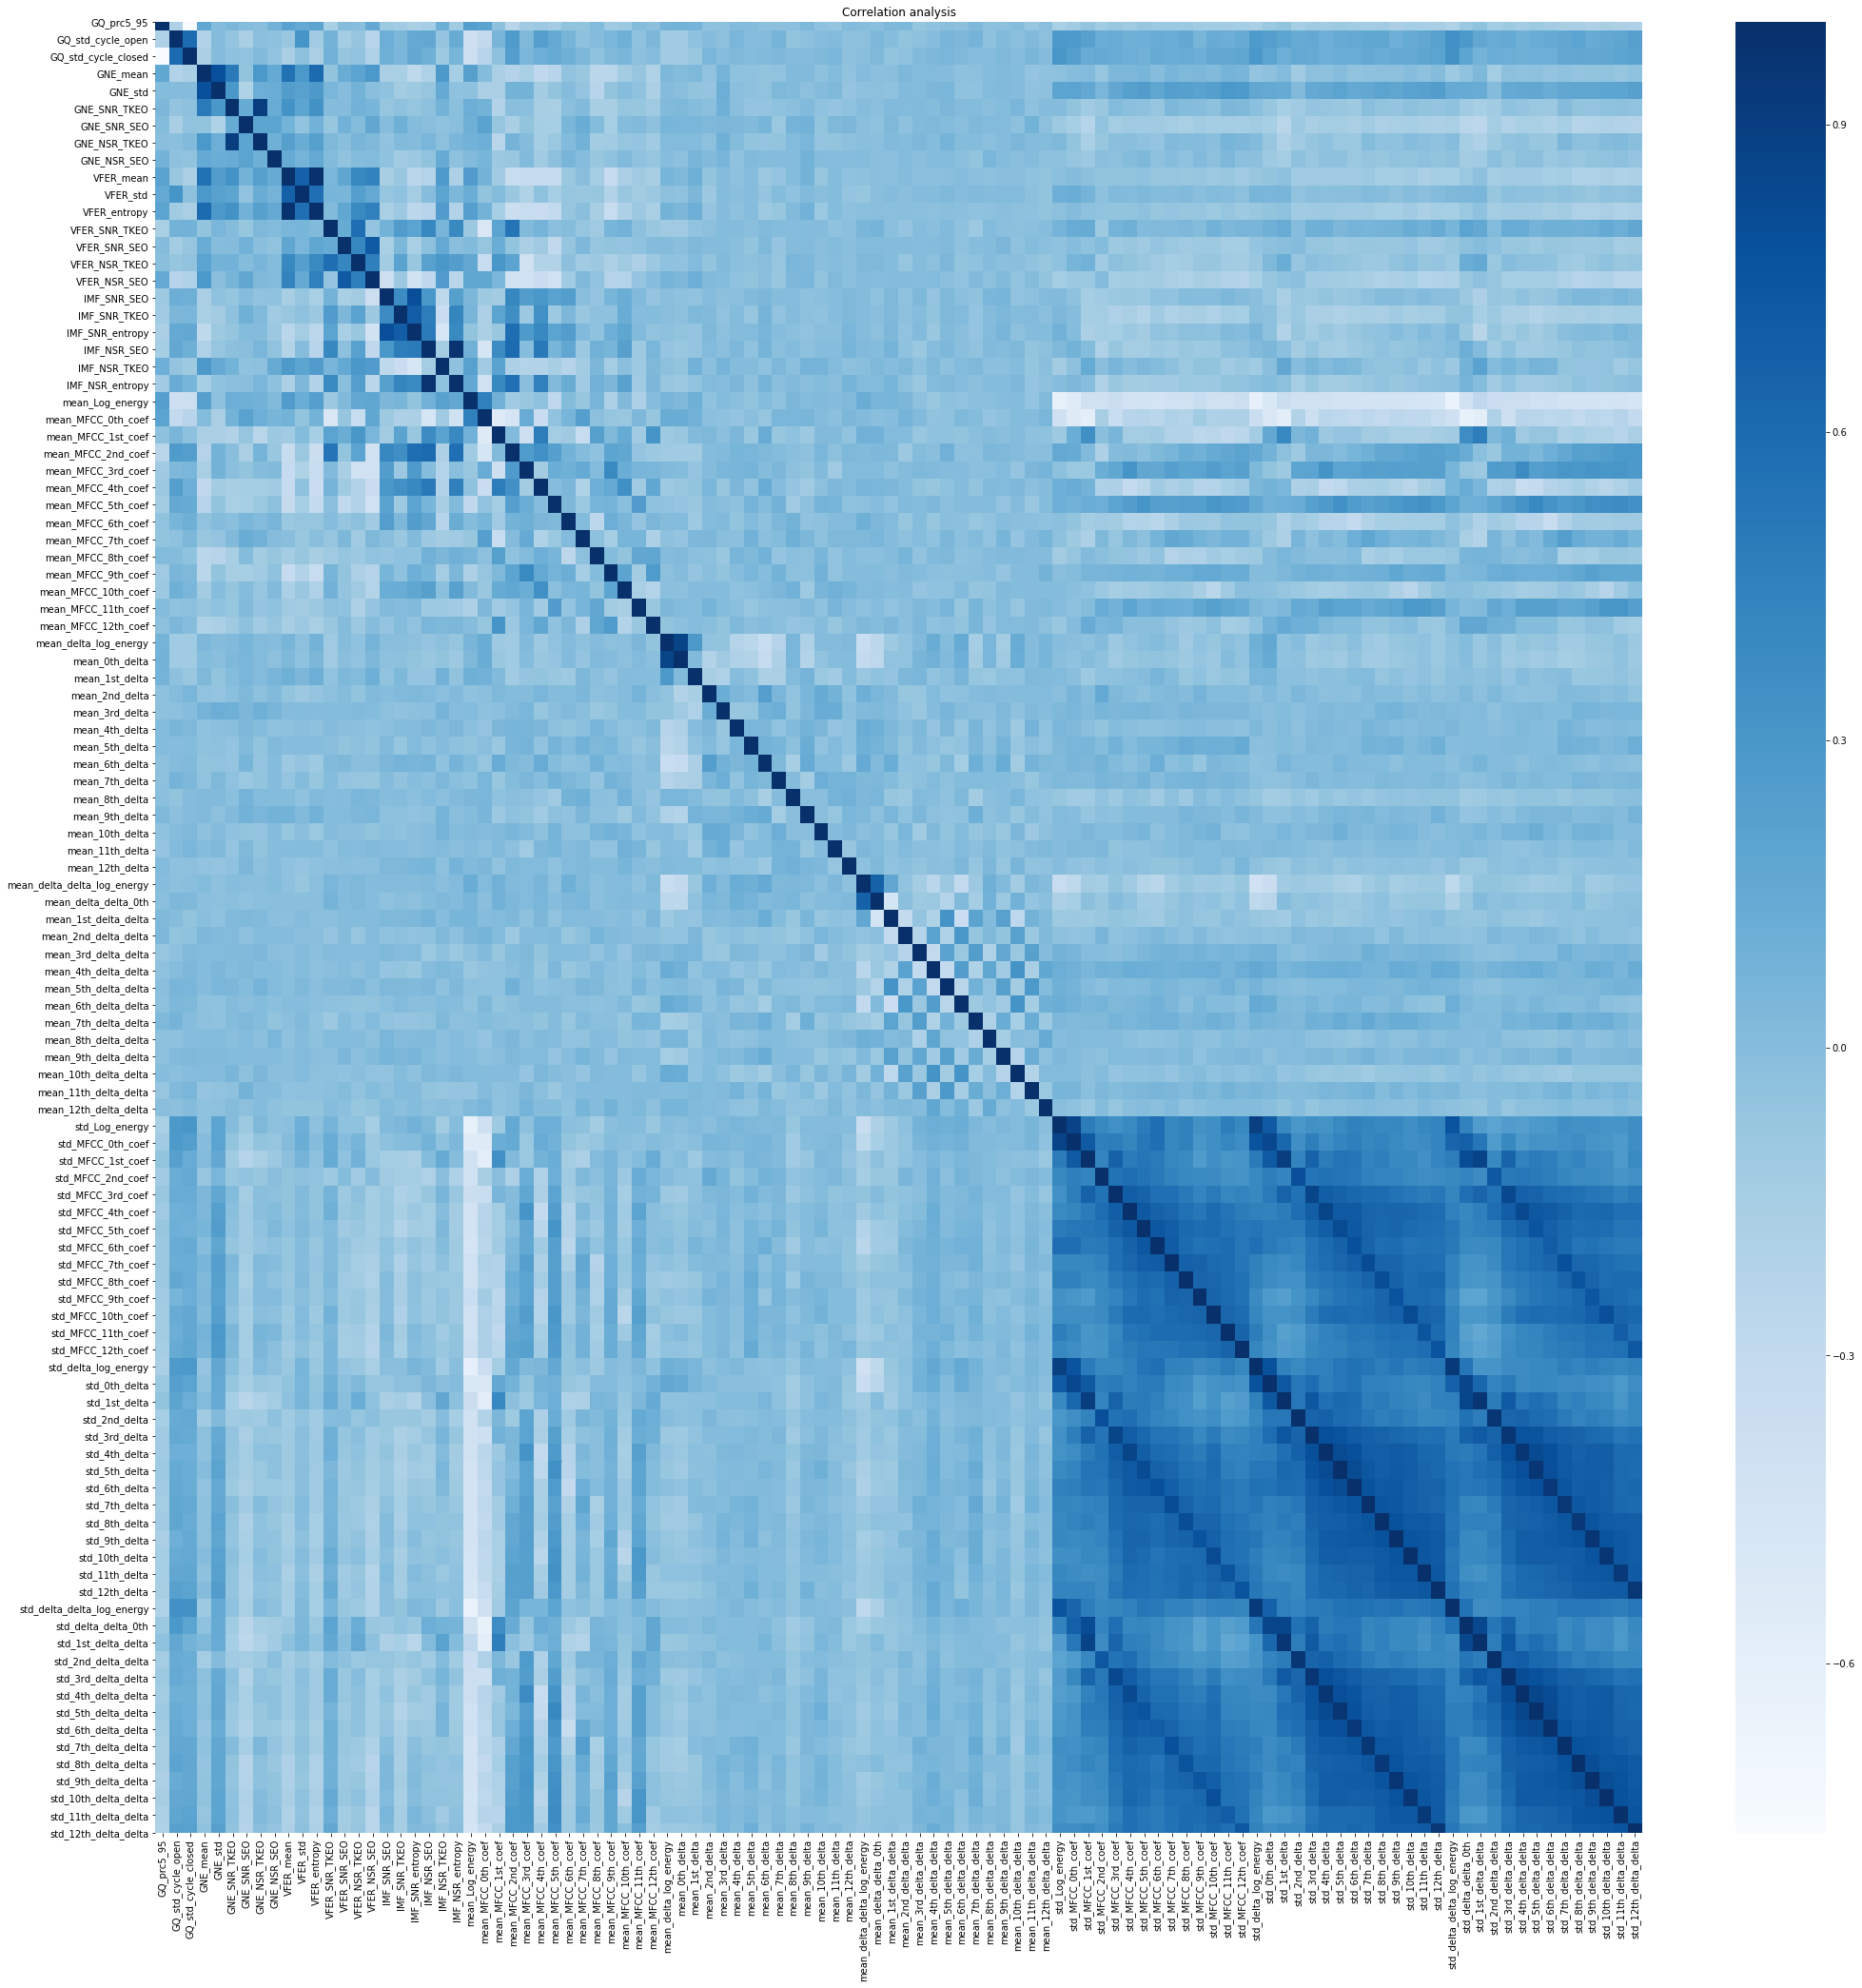

In [10]:
heat_data = data.loc[ : , 'GQ_prc5_95':'std_12th_delta_delta']
fig = plt.figure(figsize=[35, 35])
corr_mtx = heat_data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=False, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

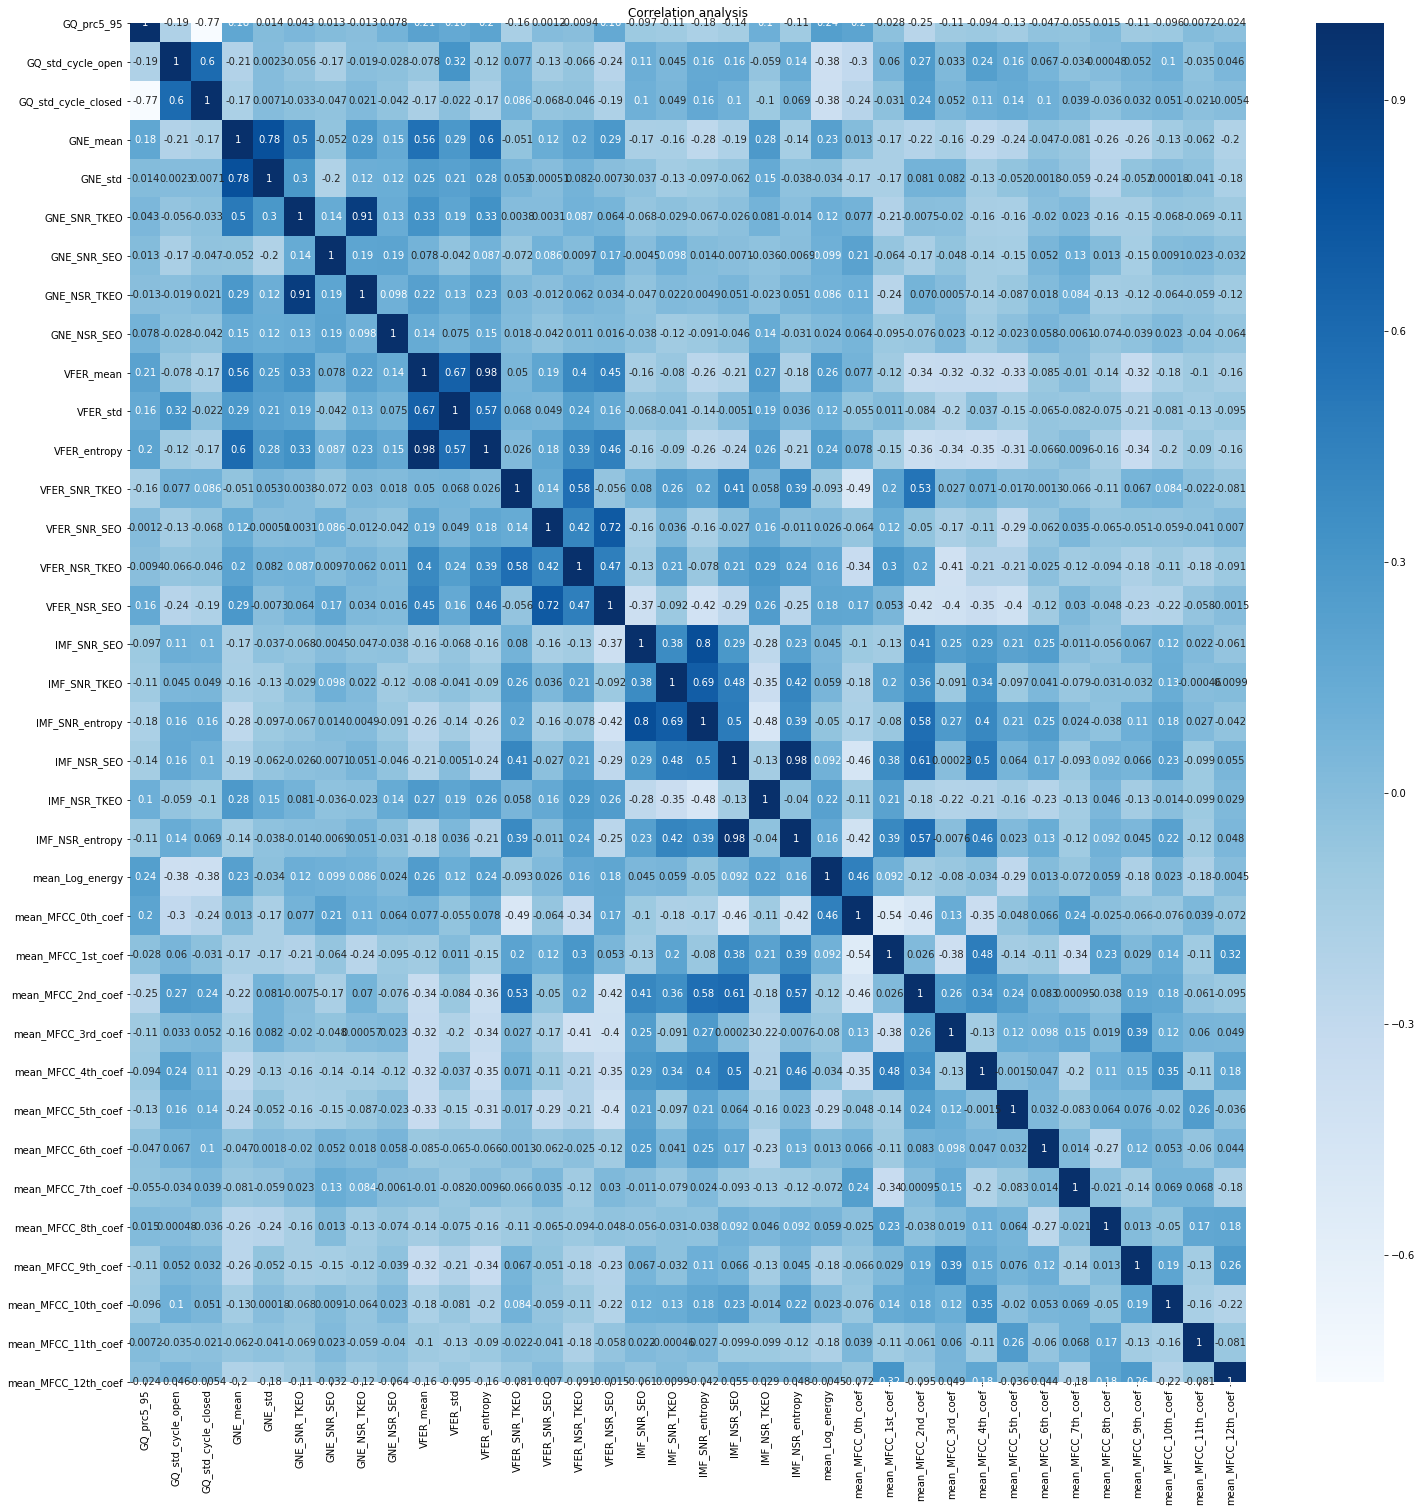

In [11]:
heat_data = data.loc[ : , 'GQ_prc5_95':'mean_MFCC_12th_coef']
fig = plt.figure(figsize=[25, 25])
corr_mtx = heat_data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

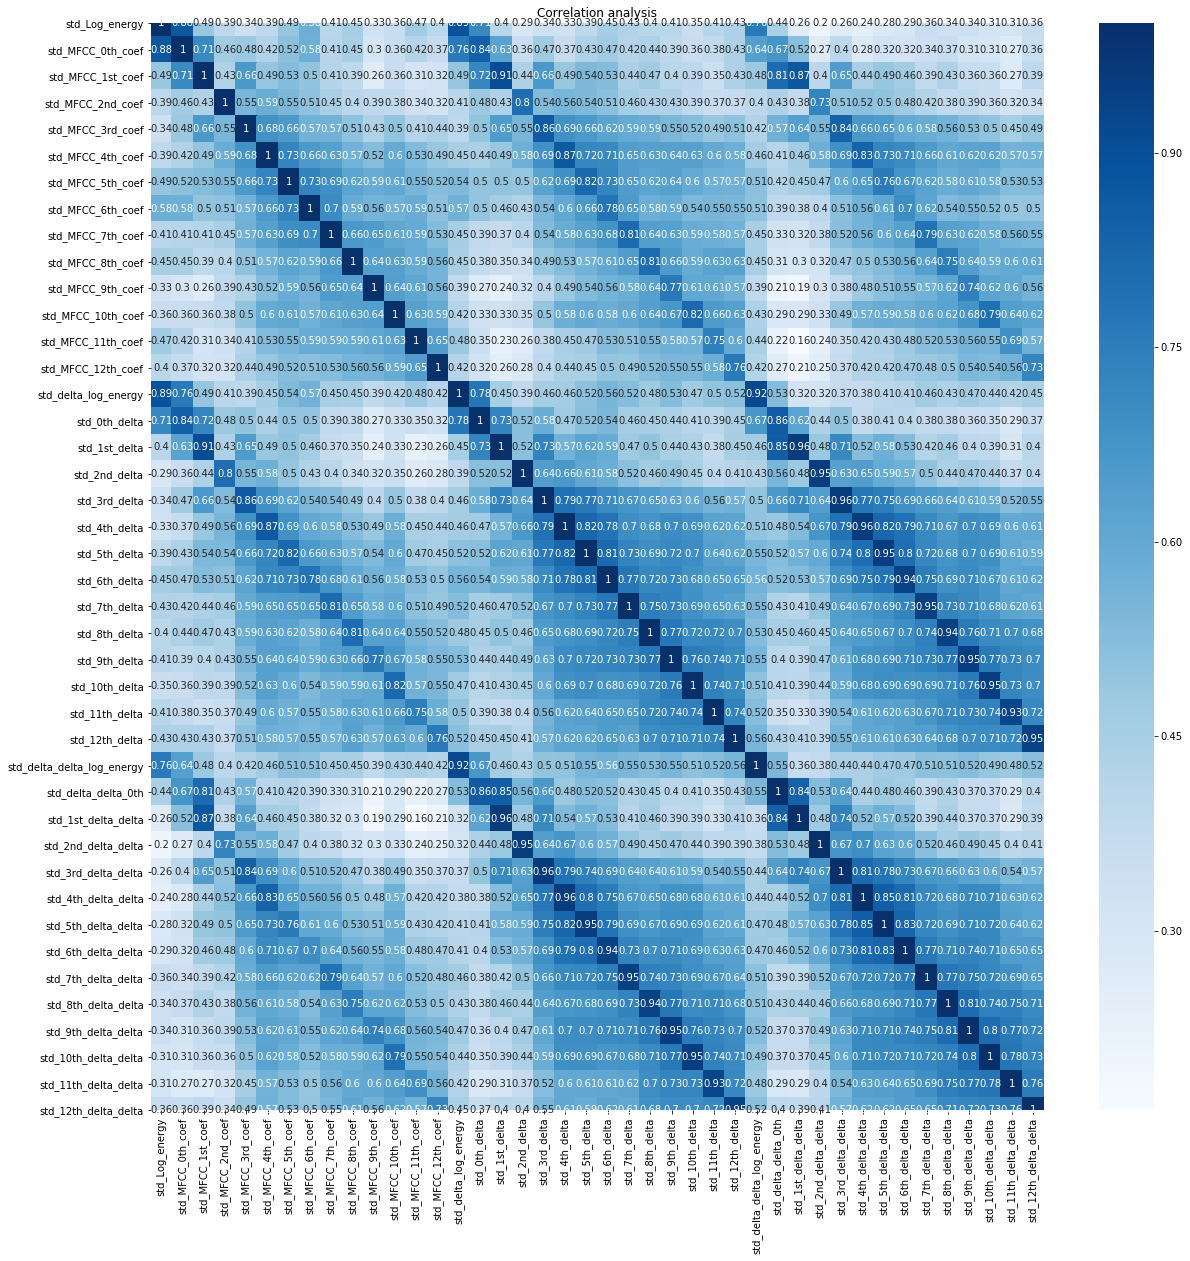

In [12]:
heat_data = data.loc[ : , 'std_Log_energy':'std_12th_delta_delta']
fig = plt.figure(figsize=[20, 20])
corr_mtx = heat_data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

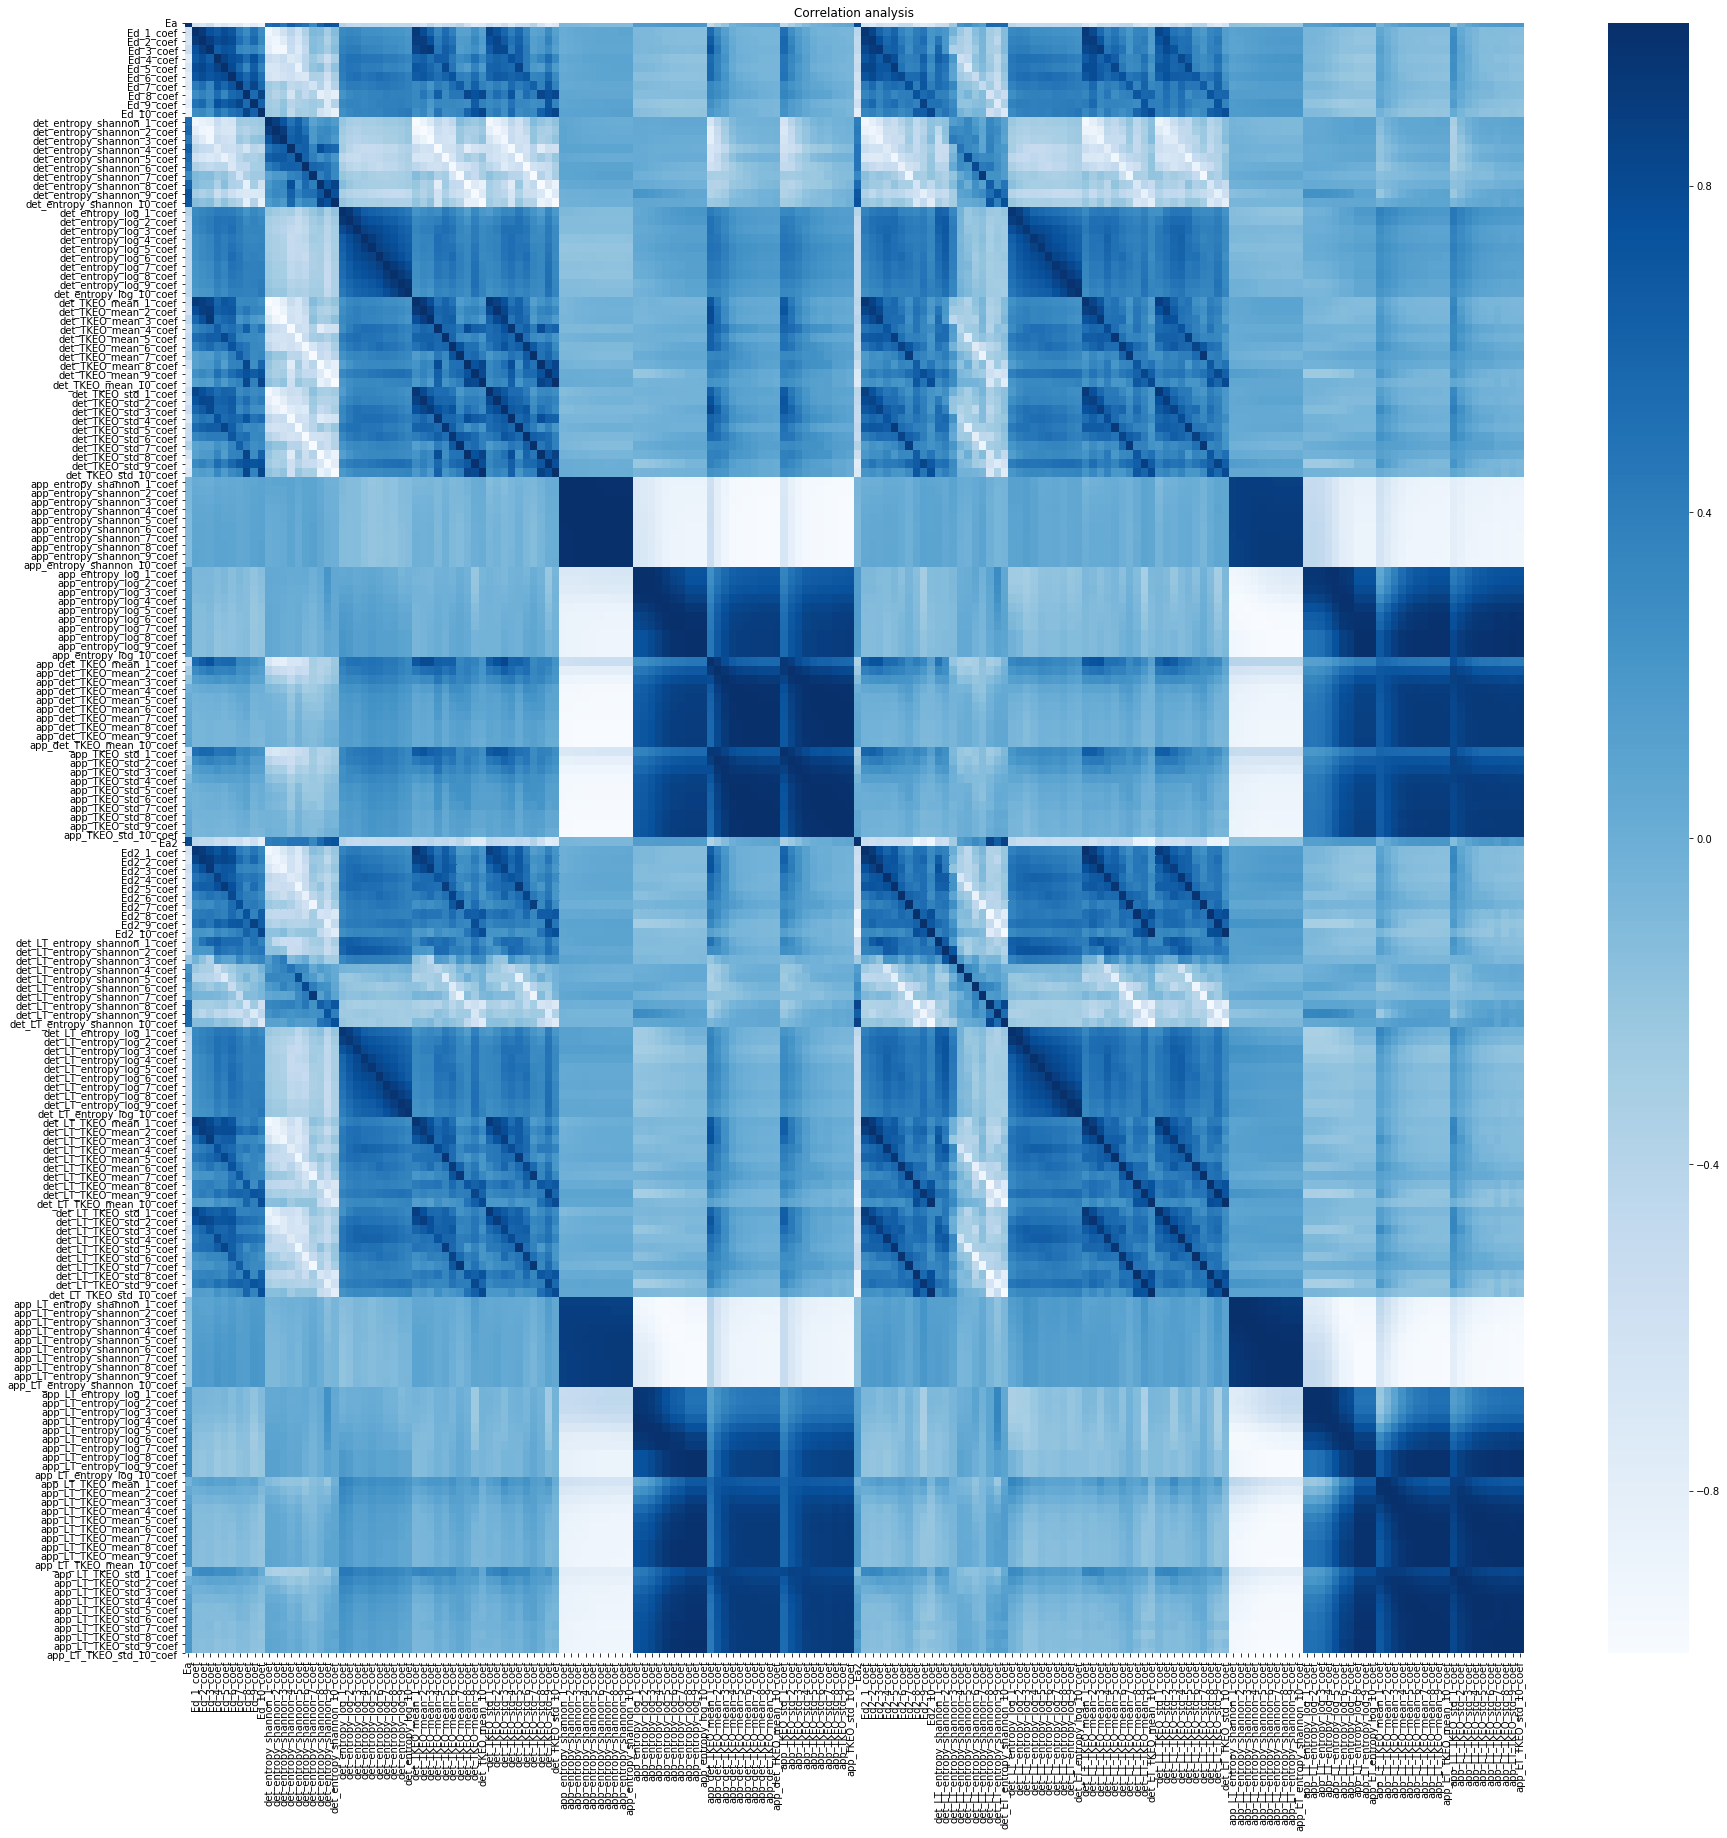

In [19]:
heat_data = data.loc[ : , 'Ea':'app_LT_TKEO_std_10_coef']
fig = plt.figure(figsize=[30, 30])
corr_mtx = heat_data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=False, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

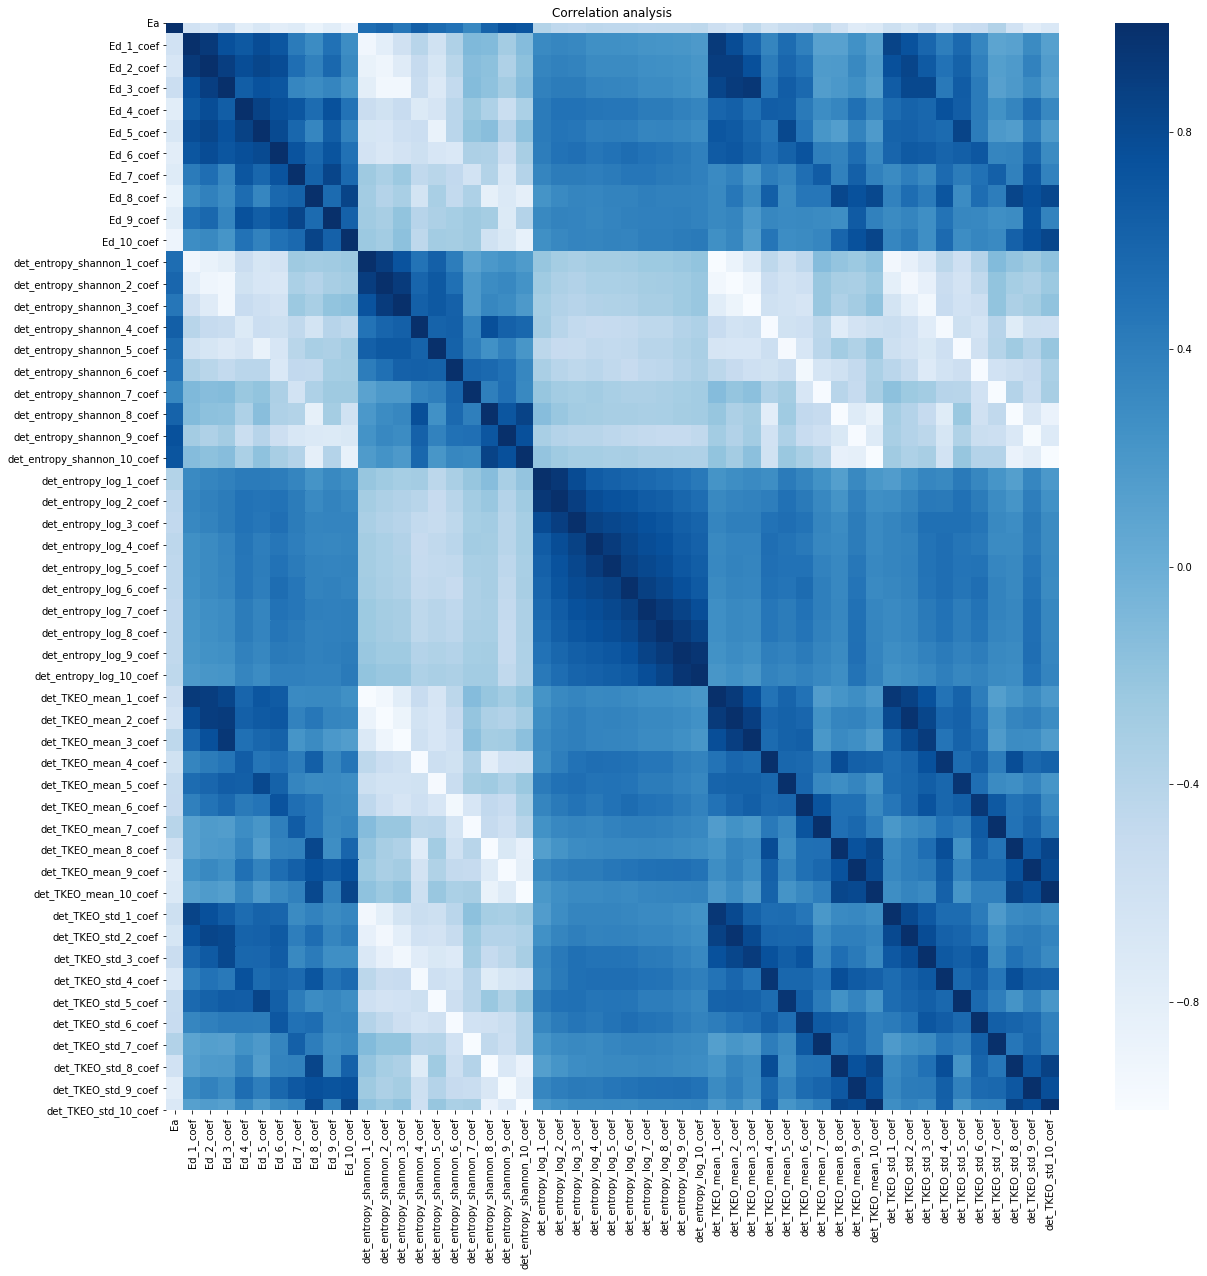

In [17]:
heat_data = data.loc[ : , 'Ea':'det_TKEO_std_10_coef']
fig = plt.figure(figsize=[20, 20])
corr_mtx = heat_data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=False, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

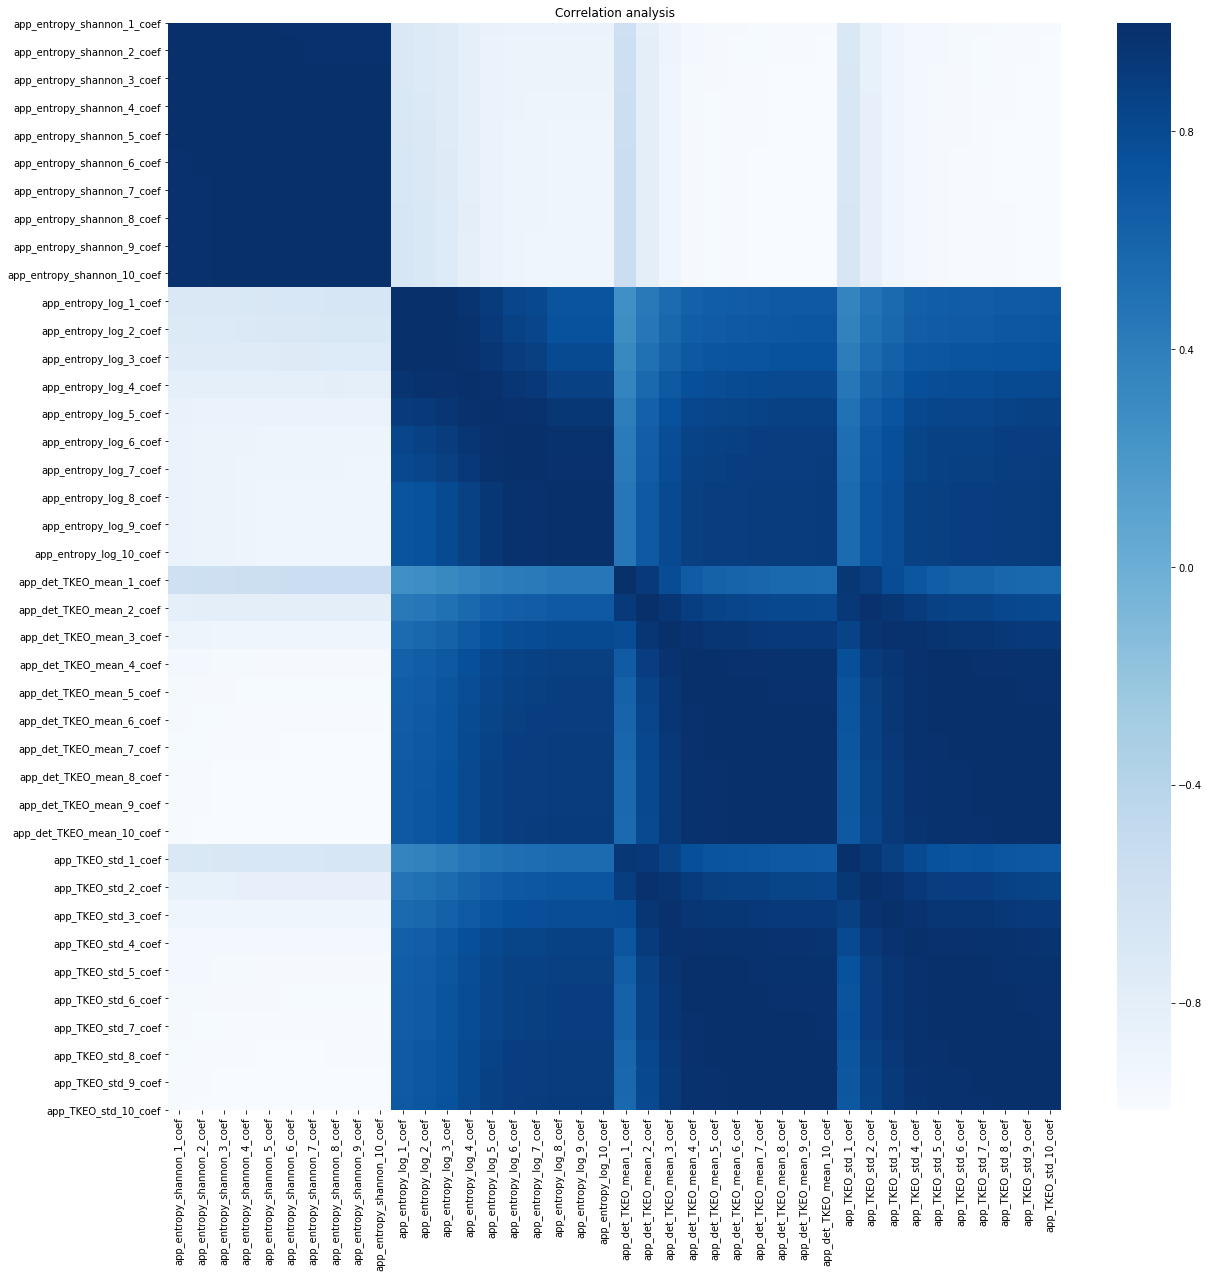

In [18]:
heat_data = data.loc[ : , 'app_entropy_shannon_1_coef':'app_TKEO_std_10_coef']
fig = plt.figure(figsize=[20, 20])
corr_mtx = heat_data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=False, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

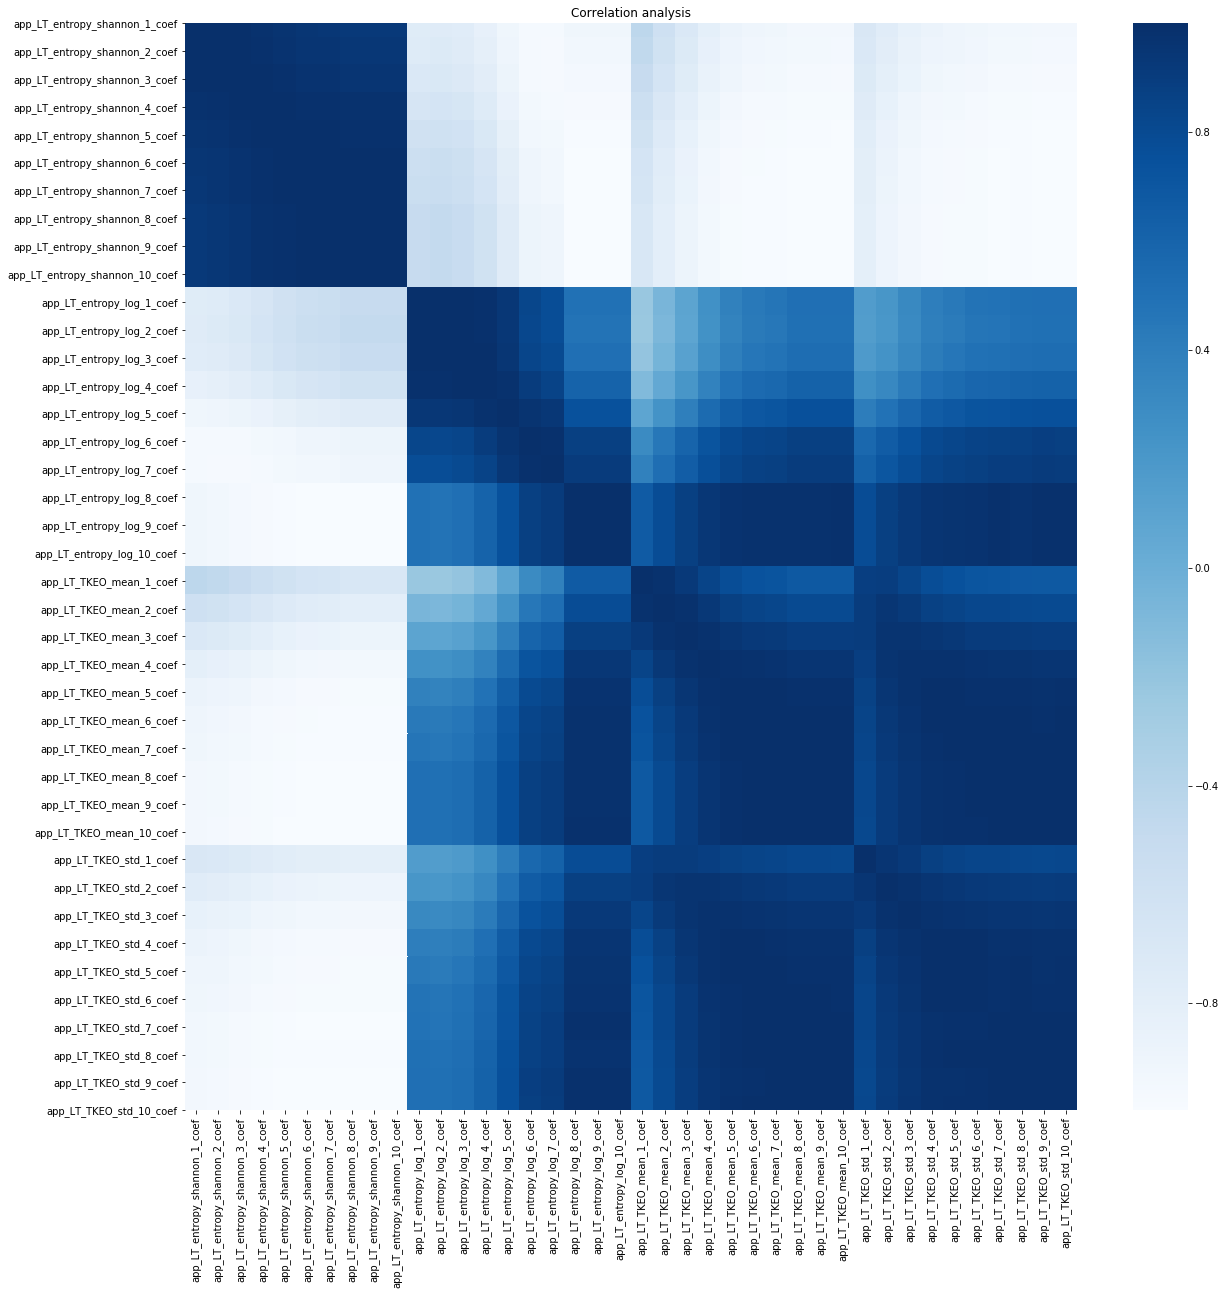

In [20]:

heat_data = data.loc[ : , 'app_LT_entropy_shannon_1_coef':'app_LT_TKEO_std_10_coef']
fig = plt.figure(figsize=[20, 20])
corr_mtx = heat_data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=False, cmap='Blues')
plt.title('Correlation analysis')
plt.show()